In [2]:
import pandas as pd
import numpy as np

In [3]:
online_foods_df = pd.read_csv(r'C:\Users\user\Desktop\online_foods\onlinefoods.csv')

In [5]:
online_foods_df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [6]:
online_foods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [7]:
online_foods_df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [9]:
online_foods_df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [10]:
# Data Cleaning Steps

# Check for missing values
missing_values = online_foods_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = online_foods_df.duplicated().sum()

# Examine 'Unnamed: 12' column for uniqueness
unnamed_column_unique_values = online_foods_df['Unnamed: 12'].unique()

# Data types of columns
data_types = online_foods_df.dtypes

missing_values, duplicate_rows, unnamed_column_unique_values, data_types


(Age                           0
 Gender                        0
 Marital Status                0
 Occupation                    0
 Monthly Income                0
 Educational Qualifications    0
 Family size                   0
 latitude                      0
 longitude                     0
 Pin code                      0
 Output                        0
 Feedback                      0
 Unnamed: 12                   0
 dtype: int64,
 103,
 array(['Yes', 'No'], dtype=object),
 Age                             int64
 Gender                         object
 Marital Status                 object
 Occupation                     object
 Monthly Income                 object
 Educational Qualifications     object
 Family size                     int64
 latitude                      float64
 longitude                     float64
 Pin code                        int64
 Output                         object
 Feedback                       object
 Unnamed: 12                    object
 dtype

In [13]:
# Remove duplicate rows
data_cleaned = online_foods_df.drop_duplicates()

# Considering the unclear significance of 'Unnamed: 12' column, we'll drop it for clarity in our analysis
data_cleaned = data_cleaned.drop(columns=['Unnamed: 12'])

# Verify the changes
duplicate_rows_after = data_cleaned.duplicated().sum()
columns_after = data_cleaned.columns

duplicate_rows_after, columns_after


(0,
 Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
        'Educational Qualifications', 'Family size', 'latitude', 'longitude',
        'Pin code', 'Output', 'Feedback'],
       dtype='object'))

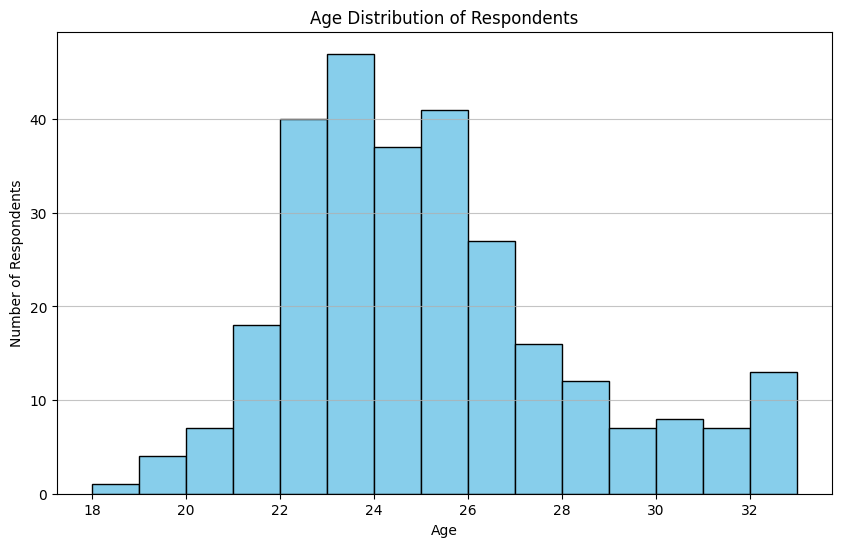

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()


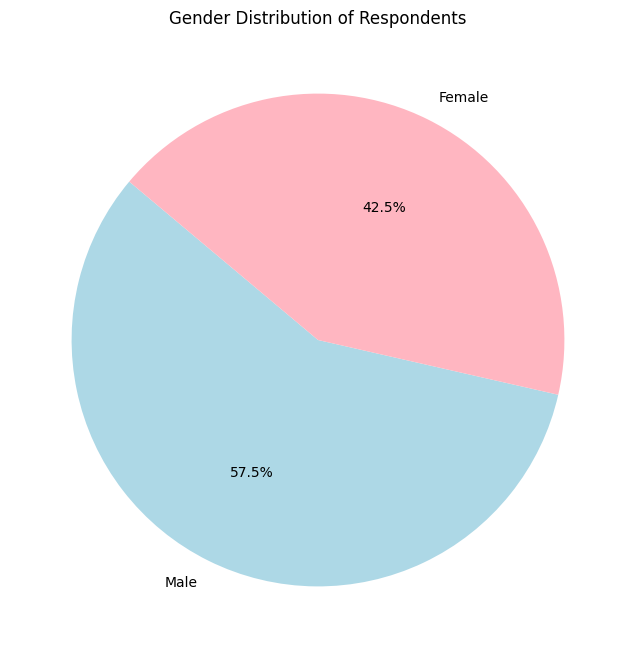

In [14]:
# Gender Distribution
gender_counts = data_cleaned['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution of Respondents')
plt.show()


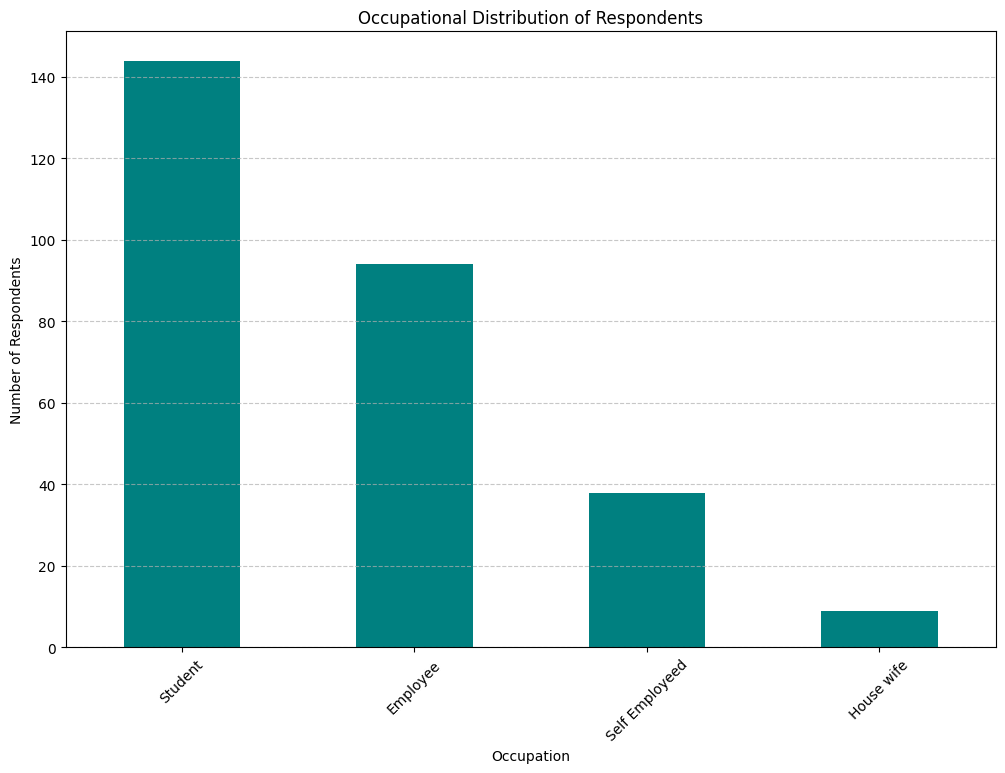

In [15]:
# Occupational Distribution
occupation_counts = data_cleaned['Occupation'].value_counts()

plt.figure(figsize=(12, 8))
occupation_counts.plot(kind='bar', color='teal')
plt.title('Occupational Distribution of Respondents')
plt.xlabel('Occupation')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


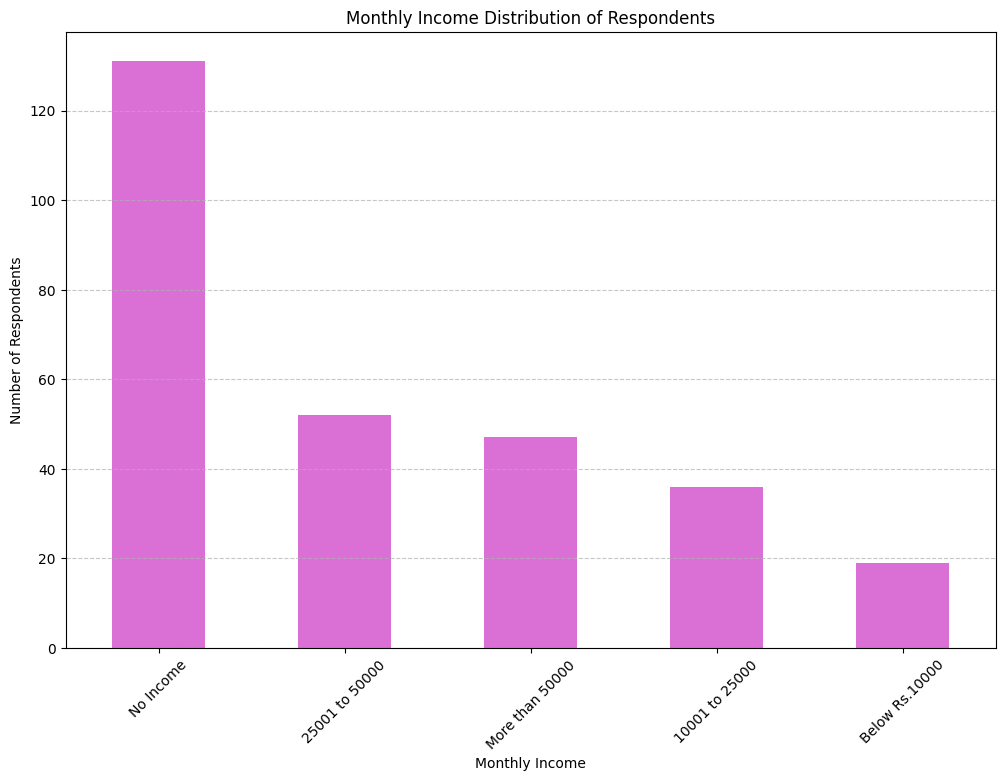

In [16]:
# Monthly Income Distribution
monthly_income_counts = data_cleaned['Monthly Income'].value_counts()

plt.figure(figsize=(12, 8))
monthly_income_counts.plot(kind='bar', color='orchid')
plt.title('Monthly Income Distribution of Respondents')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


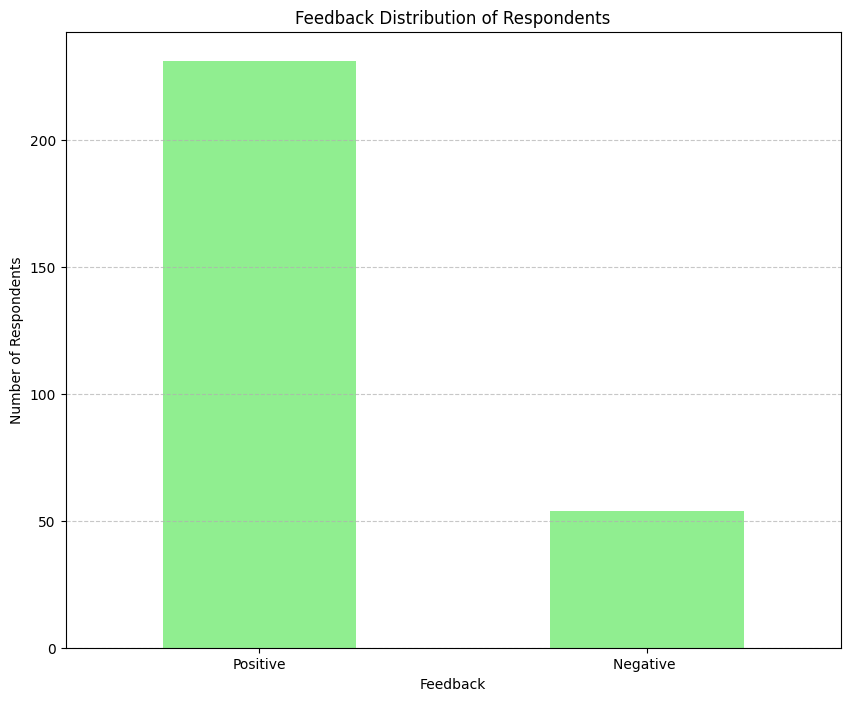

In [17]:
# Feedback Analysis
feedback_counts = data_cleaned['Feedback'].value_counts()

plt.figure(figsize=(10, 8))
feedback_counts.plot(kind='bar', color='lightgreen')
plt.title('Feedback Distribution of Respondents')
plt.xlabel('Feedback')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
